In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d jangedoo/utkface-new
!unzip -q utkface-new.zip -d utkface

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
 73% 243M/331M [00:00<00:00, 1.27GB/s]
100% 331M/331M [00:00<00:00, 1.23GB/s]


In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

data_dir = "/content/utkface/UTKFace"
image_paths = []
ages = []

for filename in os.listdir(data_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        try:
            age = int(filename.split("_")[0])
            image_paths.append(os.path.join(data_dir, filename))
            ages.append(age)
        except:
            continue

images = []
for path in image_paths:
    img = cv2.imread(path)
    img = cv2.resize(img, (100, 100))
    images.append(img)

X = np.array(images) / 255.0
y = np.array(ages)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32, callbacks=[early_stop])

model.save("utkface_age_predictor.h5")


Epoch 1/5
593/593 ━━━━━━━━━━━━━━━━━━━━ 84s 140ms/step - loss: 418.0178 - mae: 15.5119 - val_loss: 192.2705 - val_mae: 10.1947
Epoch 2/5
593/593 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - loss: 214.3140 - mae: 11.0803 - val_loss: 198.6692 - val_mae: 10.3703
Epoch 3/5
593/593 ━━━━━━━━━━━━━━━━━━━━ 82s 138ms/step - loss: 179.1761 - mae: 10.0049 - val_loss: 130.9465 - val_mae: 8.3586
Epoch 4/5
593/593 ━━━━━━━━━━━━━━━━━━━━ 81s 136ms/step - loss: 157.1534 - mae: 9.3993 - val_loss: 119.0340 - val_mae: 8.0461
Epoch 5/5
593/593 ━━━━━━━━━━━━━━━━━━━━ 81s 137ms/step - loss: 148.1779 - mae: 9.1580 - val_loss: 115.7132 - val_mae: 7.9837


with yolo

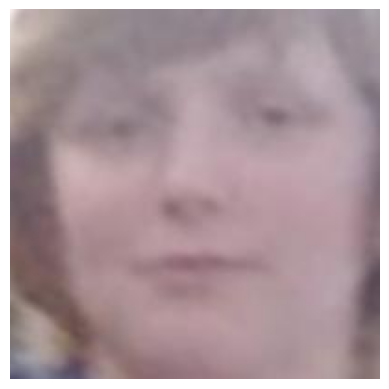

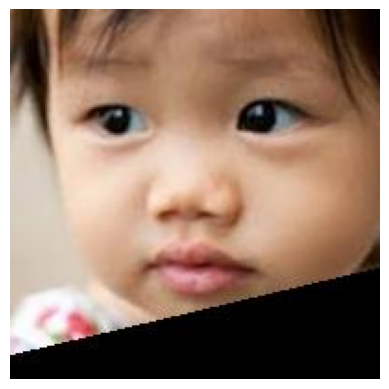

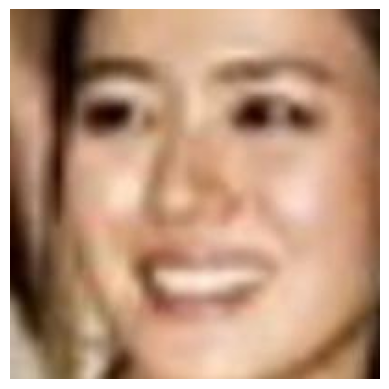

In [6]:
import zipfile, os, glob, shutil
import cv2
import numpy as np
import matplotlib.pyplot as plt


zip_path = "./utkface-new.zip"
extract_path = "./utkface"
sample_path = "./sample_faces"
os.makedirs(sample_path, exist_ok=True)


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


image_dir = os.path.join(extract_path, "UTKFace")
sample_images = glob.glob(os.path.join(image_dir, "*.jpg"))[:10]

for path in sample_images:
    shutil.copy(path, sample_path)


for img_path in sample_images[:3]:
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [12]:
!git clone https://github.com/ultralytics/yolov5
%cd /content/yolov5
!pip install -r requirements.txt


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-

In [13]:
!python yolov5/detect.py --weights yolov5s.pt --source ./sample_faces --save-crop --project yolo_output --name utkfaces --exist-ok


python3: can't open file '/content/yolov5/yolov5/detect.py': [Errno 2] No such file or directory


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# ساخت مدل ساده پیش‌بینی سن
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error')

faces = []
crop_path = "./yolo_output/utkfaces/crops/person"

for file in os.listdir(crop_path):
    img = cv2.imread(os.path.join(crop_path, file))
    img = cv2.resize(img, (100, 100))
    img = img / 255.0
    faces.append(img)

X = np.array(faces)

predicted = model.predict(X)
for i, p in enumerate(predicted):
    print(f"Face {i+1}: Predicted Age = {int(p[0])}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


FileNotFoundError: [Errno 2] No such file or directory: './yolo_output/utkfaces/crops/person'